In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5502,ham,Apo all other are mokka players only,NaN,NaN,NaN
5170,ham,I'm in school now n i'll be in da lab doing so...,NaN,NaN,NaN
4317,ham,S...i will take mokka players only:),NaN,NaN,NaN
4750,spam,Your weekly Cool-Mob tones are ready to downlo...,NaN,NaN,NaN
3181,ham,"My Parents, My Kidz, My Friends n My Colleague...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

## Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
523,ham,"That's very rude, you on campus?"
1786,ham,Do you know why god created gap between your f...
991,ham,Hi im having the most relaxing time ever! we h...
1933,ham,R u over scratching it?
3207,ham,Oops my phone died and I didn't even know. Yea...


In [6]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df['target']=df['target'].replace({'spam':1,'ham':0})
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#check for missing values and duplicates
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

## EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

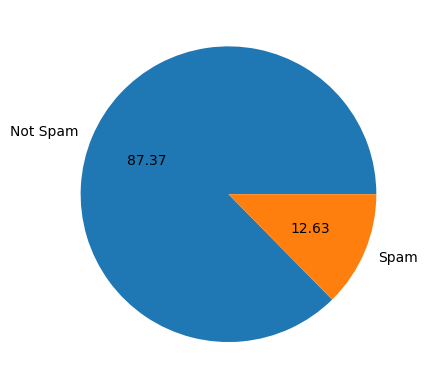

In [13]:
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

#### The Data is Imbalanced

In [14]:
df['num_char']=df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SPANDAN
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
#number of sentences
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# for spam
df[df['target']==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [20]:
# for not spam
df[df['target']==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


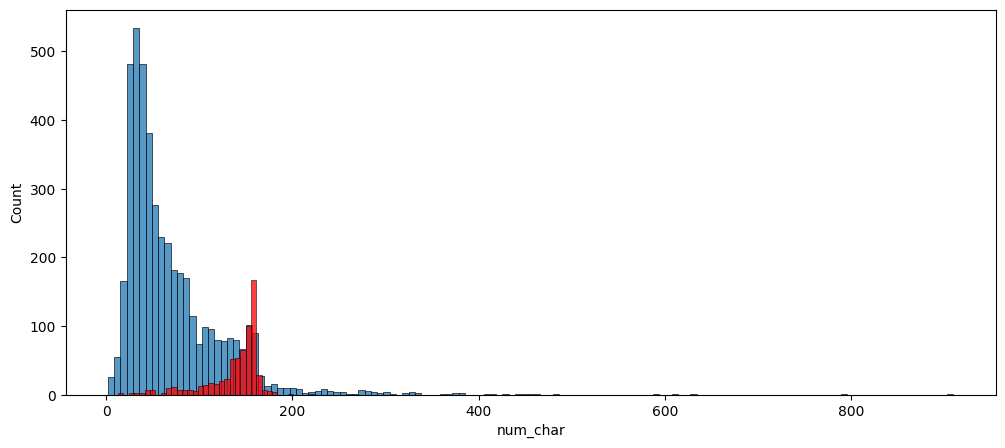

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')
plt.show()

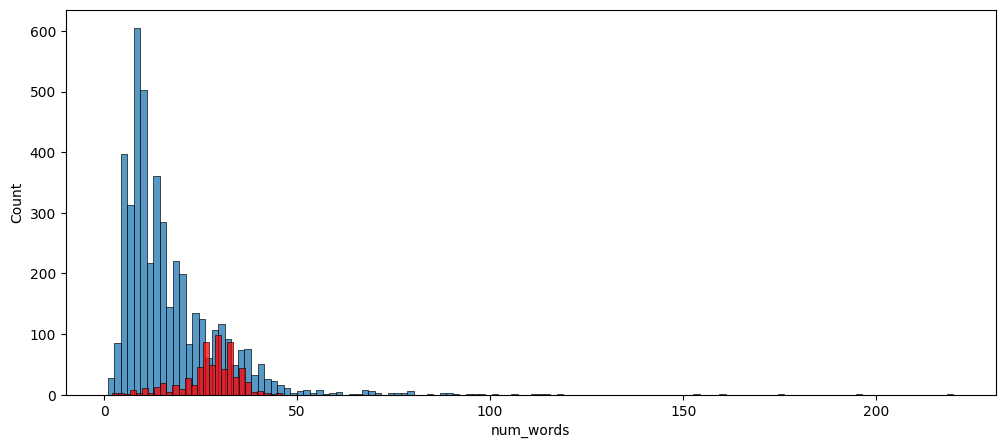

In [22]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

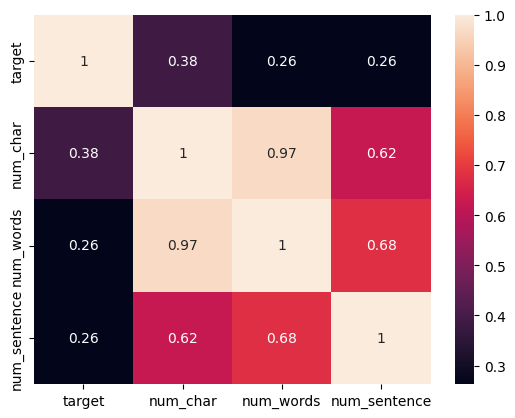

In [23]:
select_column=df.drop(columns=['text'])
sns.heatmap(select_column.corr(),annot=True)
plt.show()

## Data Preprocessing

In [24]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SPANDAN
[nltk_data]     CHATTERJEE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def transform_text(text):
    #lowecase
    text=text.lower()
    
    #tokenize
    text=nltk.word_tokenize(text)
    
    #removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    #removing stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)        
            

In [27]:
transform_text(df['text'][21])

'go tri 2 month ha ha joke'

In [28]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

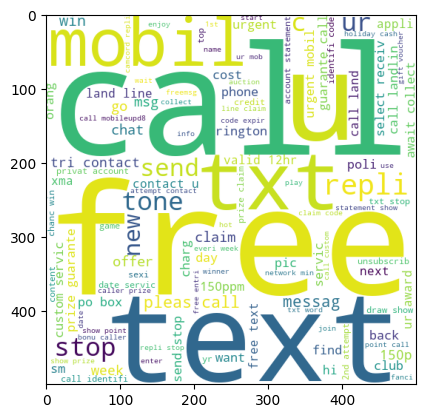

In [30]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

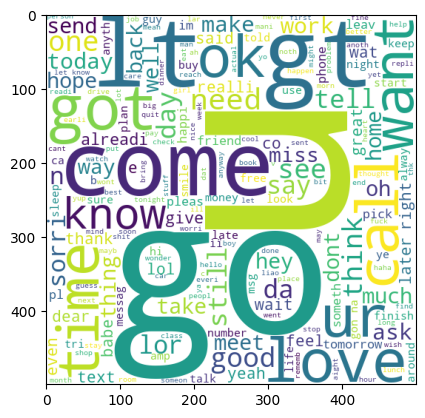

In [31]:
n_spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(n_spam_wc)

## Model Building

In [118]:
df.to_csv('CleanedData.csv', index=False)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [33]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [34]:
y=df['target'].values

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

#### We know naive baiyes performs better for textual data so we will use naive bayes

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [38]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [39]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [40]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### since the data is imbalanced so rather than accuracy we will more focus on precision score
#### Multinomial Naive Bayes Performed best among the others

### Trying other algorithms 

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [105]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [93]:
clfs = {
    'LR': lrc,
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc,  
    'KN' : knc, 
    'RF': rfc, 
}

In [103]:
def Train_Classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [106]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    curr_acc,curr_prec=Train_Classifier(clf,X_train,y_train,X_test,y_test)
    accuracy_scores.append(curr_acc)
    precision_scores.append(curr_prec)
performance_df=pd.DataFrame({'Algorithms':clfs.keys(),'Accurcy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithms,Accurcy,Precision
2,NB,0.970986,1.000000
4,KN,0.905222,1.000000
5,RF,0.975822,0.982906
1,SVC,0.975822,0.974790
0,LR,0.958414,0.970297
3,DT,0.927466,0.811881


#### in KNN the model has good precision but low accuracy
#### Naive Bayes, Random Forest and SVC has good accuracy as well as precision
#### Still Multinomial Naive Bayes is the best aong them

### Now we will check if we can improve our model by using voting Classifier

In [110]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('rf',rfc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [111]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


#### Accuracy increased a bit but precision decreased
#### So still MNB is the best choice

### Now we will check if we can improve the model by appending th number of character column

In [114]:
X1=tfidf.fit_transform(df['transformed_text']).toarray()
X1 = np.hstack((X1,df['num_char'].values.reshape(-1,1)))
X1.shape

(5169, 3001)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)
mnb = MultinomialNB()

In [117]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


#### Precision Remained same but accuracy decreased 

In [41]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))